# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [2]:
# Load dataset
import_data = 'D:\\Documents\\GitHub\\ml-project-unsupervised-learning\\Wholesale_Data.csv'
data = pd.read_csv(import_data)

In [3]:
# Checking for missing values and printing nulls
print("Missing values per column:")
print(data.isnull().sum())

# Check for duplicates and print
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())

# Display data types
print(data.dtypes)

# Display first few rows
data.head()

Missing values per column:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Number of duplicate rows:
0
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# The Channel and Region columns seemed more like categorical information so should be
# changed to reflect. This may be useful for analysis to see where purchases are originating.

# Convert to categorical columns
data['Channel'] = data['Channel'].astype('category')
data['Region'] = data['Region'].astype('category')

In [5]:
#Changing misspelled column
data.rename(columns={'Delicassen': 'Delicatessen'}, inplace=True)


In [6]:
#Observing initial data statistics to form a direction for further EDA
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


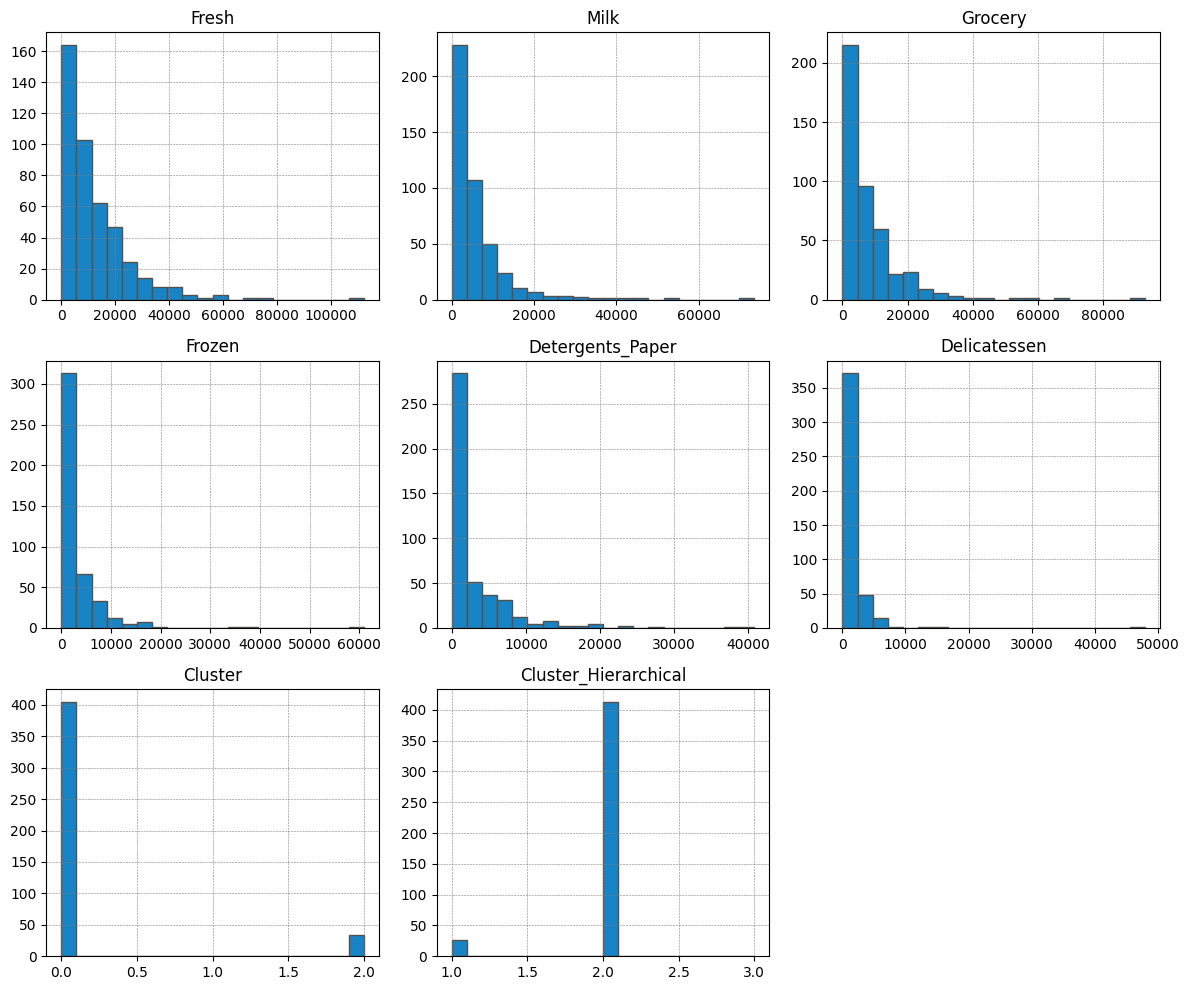

In [38]:
# Plot histograms
ax = data.hist(figsize=(12, 10), bins=20, edgecolor="#54504c", color="#1984c5")
for axis in ax:
    for subplot in axis:
        # Turn on the background grid lines
        subplot.grid(True)
        # Set the background grid line style and color
        subplot.grid(linestyle='--', linewidth=0.4, color='gray')
plt.tight_layout()
plt.show()

Data is skewed to the right. Will need to scale or transform.

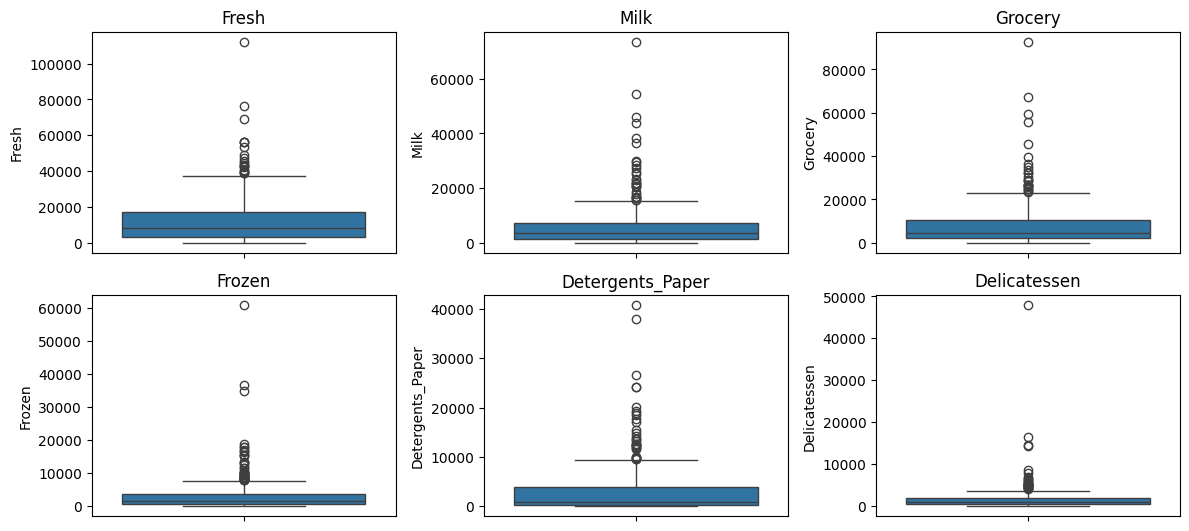

In [8]:
# Plot box plots
plt.figure(figsize=(12, 8))
for i, column in enumerate(data.columns[2:], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(column)
plt.tight_layout()
plt.show()

There seem to be quite a number of outliers in each column

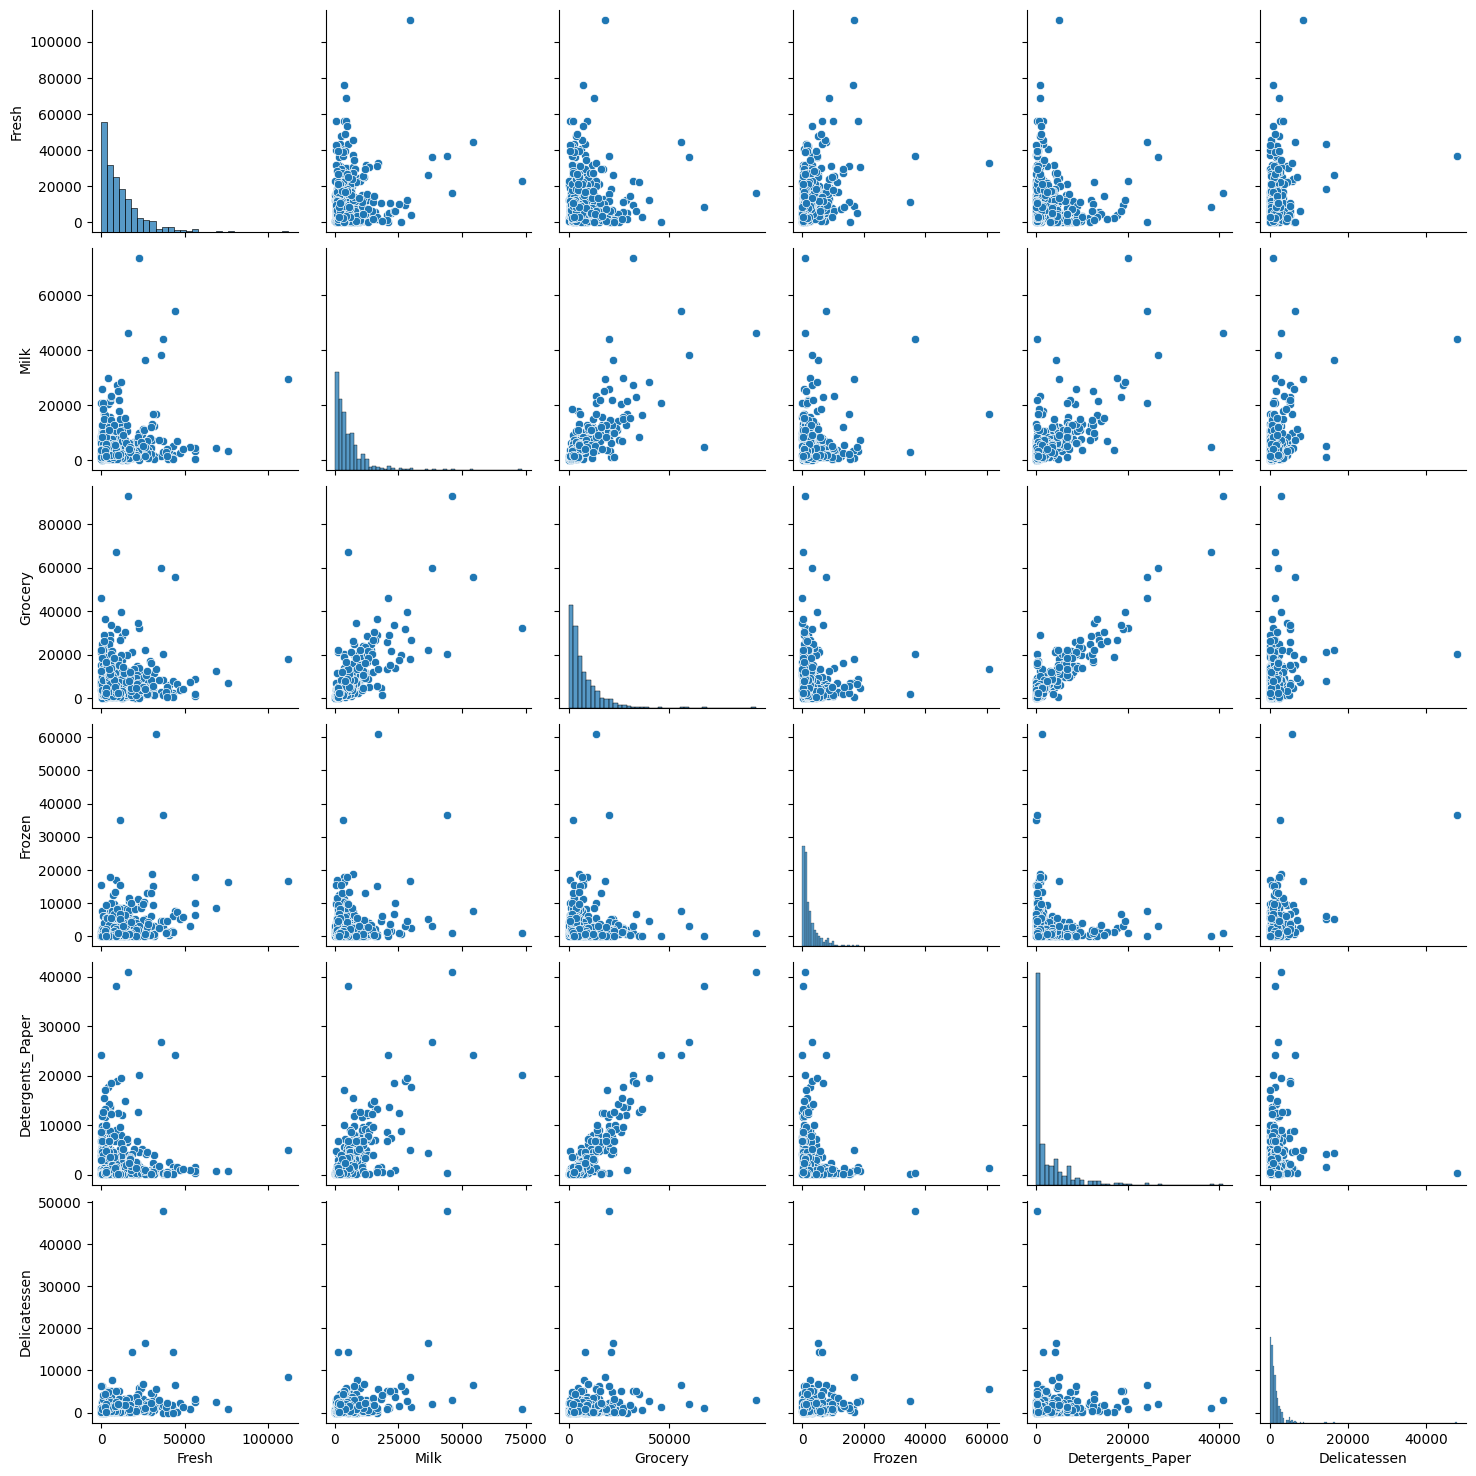

In [9]:
# Pairwise plots
sns.pairplot(data)
plt.show()

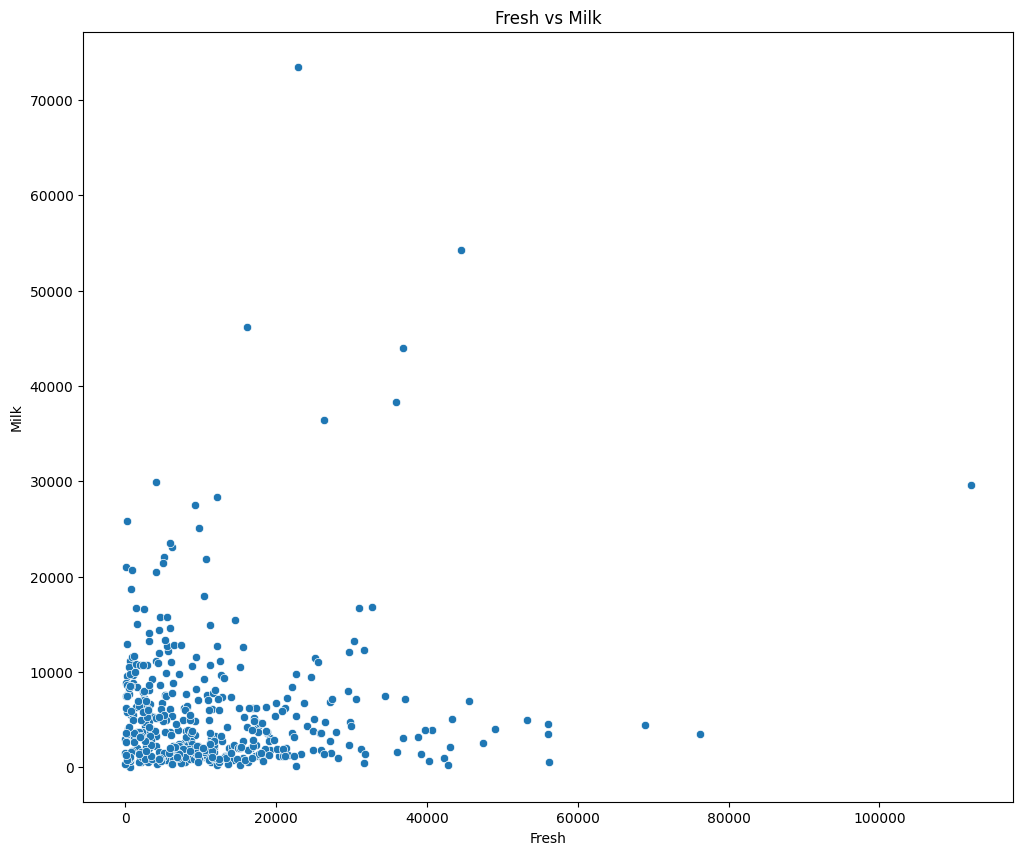

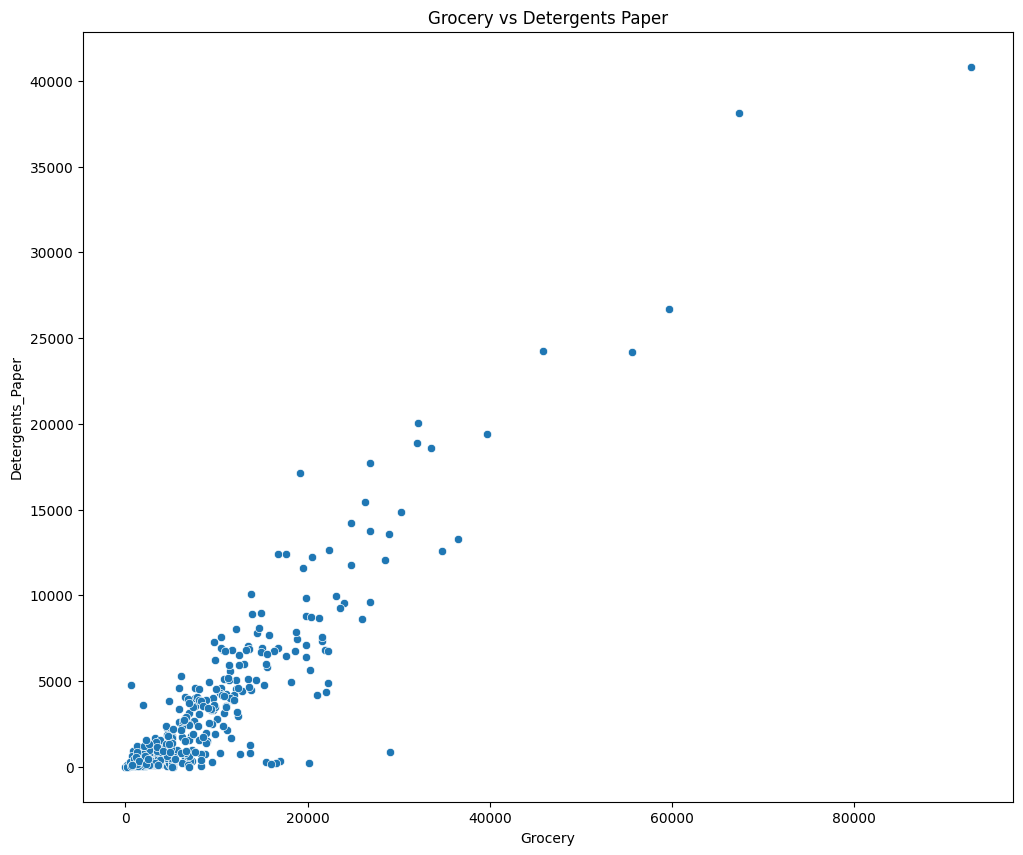

In [10]:
# Scatter plots for pairs of interest
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Fresh', y='Milk', data=data)
plt.title('Fresh vs Milk')
plt.show()

plt.figure(figsize=(12, 10))
sns.scatterplot(x='Grocery', y='Detergents_Paper', data=data)
plt.title('Grocery vs Detergents Paper')
plt.show()

It appeared like there was a strong relationship between Grocery and Detergents_Paper.

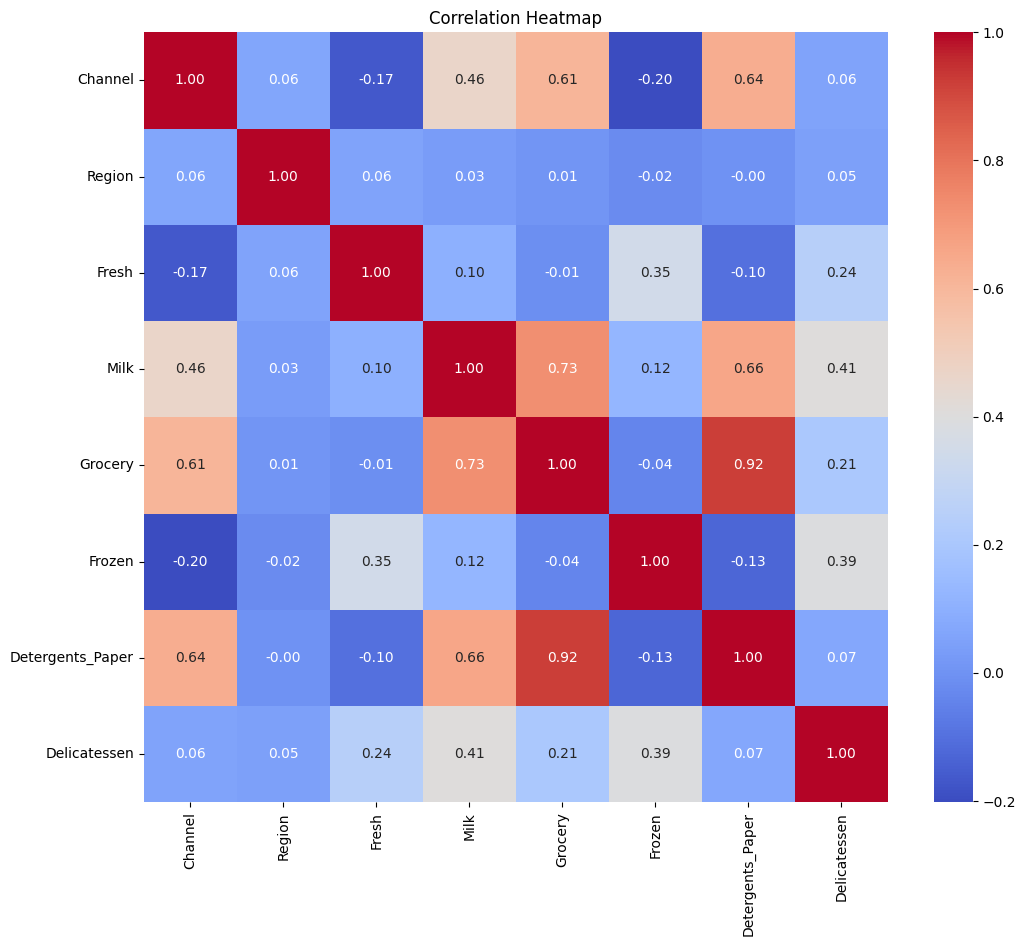

In [11]:
# Heatmap of correlations
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
# Exploring highly correlated pairs to determine if they should be removed or kept
# Add portion to check and record high correlated columns
# Compute a correlation matrix
corr_matrix = data.corr()

# Set the threshold for high correlation
threshold = 0.9

# Find pairs of highly correlated features
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            rowname = corr_matrix.columns[j]
            high_corr_pairs.append((rowname, colname, corr_matrix.iloc[i, j]))

# Print the high correlation pairs from the correlation matrix
print("\nHighly correlated pairs (correlation > {:.2f}):".format(threshold))
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: {pair[2]:.2f}")


Highly correlated pairs (correlation > 0.90):
Grocery and Detergents_Paper: 0.92


In [25]:
# Could retry model by removing the highly correlated columns one at a time. Grocery and Detergents_Paper 
# This may change the clustering.

In [13]:
# Apply RobustScaler to minimize impact of outliers.
scaler = RobustScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.select_dtypes(include=[np.number])), columns=data.select_dtypes(include=[np.number]).columns)


In [14]:
# Identify outliers after scaling
outliers_dict = {}
for column in data_scaled.columns:
    Q1 = data_scaled[column].quantile(0.25)
    Q3 = data_scaled[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = data_scaled[(data_scaled[column] < (Q1 - 1.5 * IQR)) | (data_scaled[column] > (Q3 + 1.5 * IQR))]
    outliers_dict[column] = outliers

In [15]:
#Exploring the outliers of a particular column to see if the outliers are erroneous or genuine. 
#observing their stats
outliers_fresh = outliers_dict['Fresh']
print(outliers_fresh.describe())


           Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
count  20.000000  20.000000  20.000000  20.000000         20.000000   
mean    3.134782   0.598551   0.368734   1.678201          0.381570   
std     1.261064   2.247740   1.414914   1.953884          1.441851   
min     2.193901  -0.590570  -0.503896  -0.353485         -0.214037   
25%     2.419980  -0.299483  -0.266708  -0.051209         -0.105586   
50%     2.647327   0.014671  -0.017877   1.451102         -0.003683   
75%     3.446201   0.182951   0.326453   2.305654          0.184571   
max     7.507388   8.949932   5.976361   5.868421          6.371871   

       Delicatessen  
count     20.000000  
mean       1.296140  
std        2.422858  
min       -0.671034  
25%       -0.050460  
50%        0.751771  
75%        1.159348  
max        9.479816  


In [16]:
# Exploring high correlated columns to compare if their outliers also coincide.
related_outliers = outliers_fresh[['Grocery', 'Detergents_Paper']]
print(related_outliers.describe())


         Grocery  Detergents_Paper
count  20.000000         20.000000
mean    0.368734          0.381570
std     1.414914          1.441851
min    -0.503896         -0.214037
25%    -0.266708         -0.105586
50%    -0.017877         -0.003683
75%     0.326453          0.184571
max     5.976361          6.371871


The outliers seem to be valid recordings and not errors and should be including in model. 
They are likely large purchase orders.


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

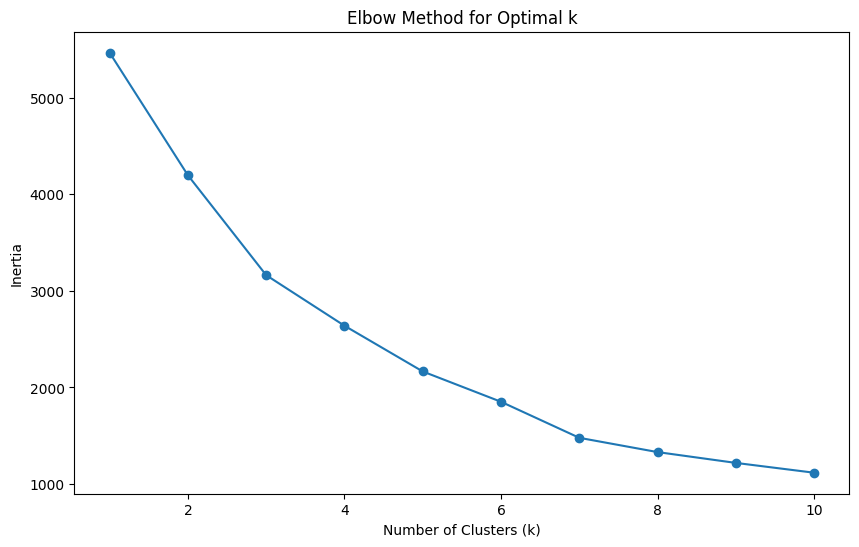

In [19]:
# Compute and plot the sum of squared distances for different k
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Use Elbow Method to determine optimal number of clusters 
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [20]:
# Perform KMeans clustering with the chosen (3) number of clusters
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data['Cluster'] = clusters

In [21]:
# Identify numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Compute cluster summary for numeric columns
cluster_summary = data.groupby('Cluster')[numeric_columns].mean()

print("Numeric Features Mean Values by Cluster:")
print(cluster_summary)

Numeric Features Mean Values by Cluster:
                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        11913.148148   4389.911111   5951.812346   3046.039506   
1        36847.000000  43950.000000  20170.000000  36534.000000   
2        12307.617647  21426.264706  31409.058824   2396.176471   

         Detergents_Paper  Delicatessen  Cluster  
Cluster                                           
0             1843.311111   1302.288889      0.0  
1              239.000000  47943.000000      1.0  
2            15325.794118   2810.970588      2.0  


In [22]:
# Analyze categorical columns separately
categorical_columns = data.select_dtypes(include=['category']).columns

# Category distribution
print("\nCategory Distribution by Channel:")
print(data.groupby('Cluster')['Channel'].value_counts())

print("\nCategory Distribution by Region:")
print(data.groupby('Cluster')['Region'].value_counts())


Category Distribution by Channel:
Cluster  Channel
0        1          296
         2          109
1        1            1
         2            0
2        2           33
         1            1
Name: count, dtype: int64

Category Distribution by Region:
Cluster  Region
0        3         293
         1          70
         2          42
1        3           1
         1           0
         2           0
2        3          22
         1           7
         2           5
Name: count, dtype: int64


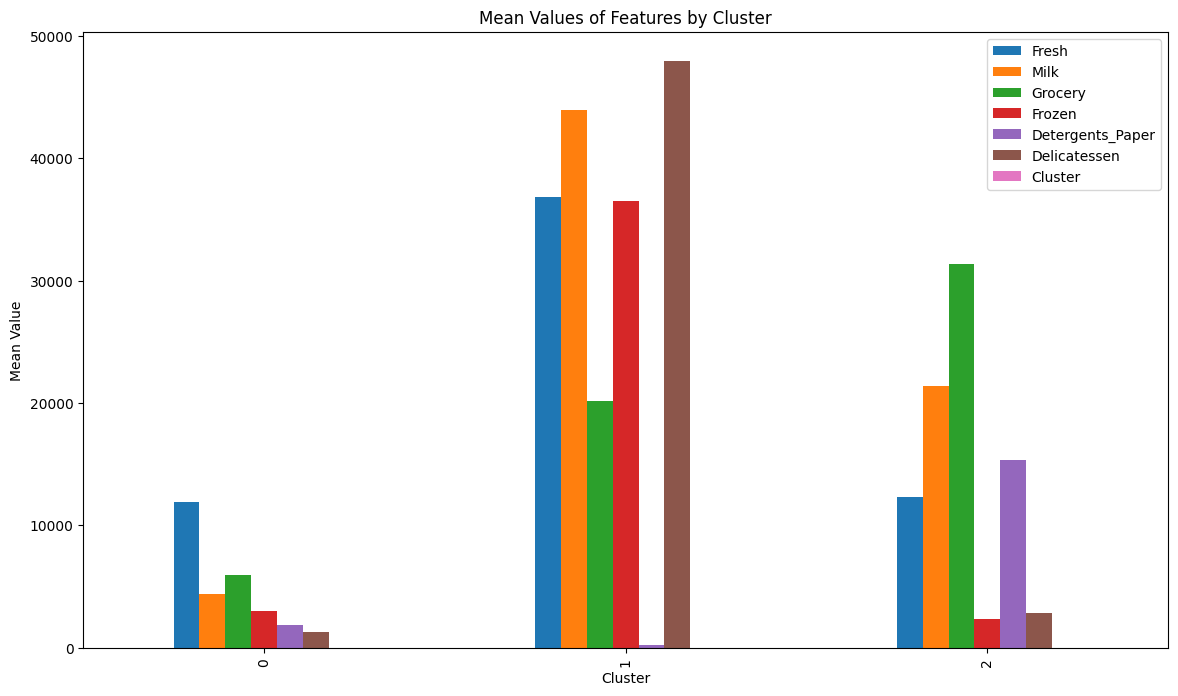

In [23]:
# Plotting the Mean Values and grouping by cluster.
# This shows that the clusters are possibly grouped by value.

cluster_summary.plot(kind='bar', figsize=(14, 8))
plt.title('Mean Values of Features by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()

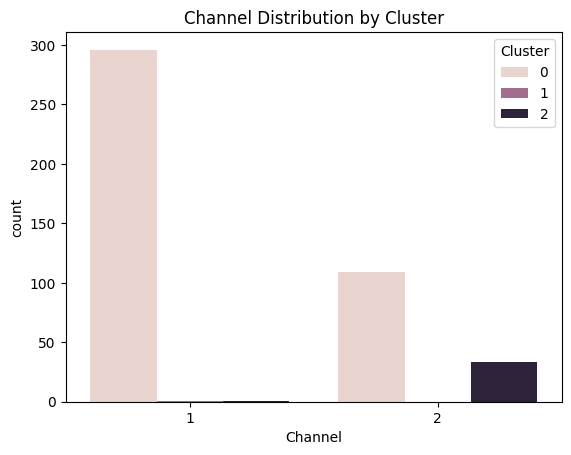

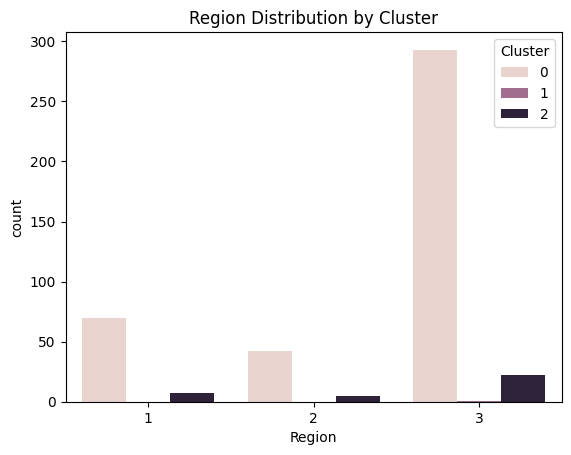

In [24]:
# Comparing the categorical columns with the clusters, may be useful for determining where large purchases are coming from.

# Plot for Channel distribution
sns.countplot(x='Channel', hue='Cluster', data=data)
plt.title('Channel Distribution by Cluster')
plt.show()

# Plot for Region distribution
sns.countplot(x='Region', hue='Cluster', data=data)
plt.title('Region Distribution by Cluster')
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

In [26]:
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist

In [27]:
# Compute the distance matrix
distance_matrix = pdist(data_scaled, metric='euclidean')

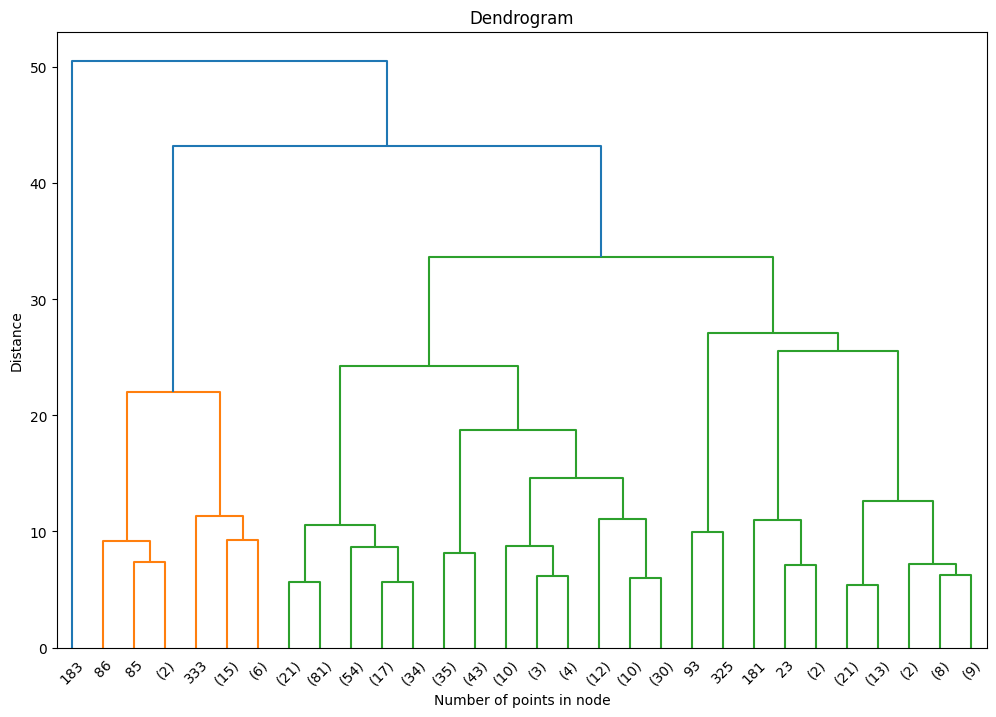

In [28]:
# Perform hierarchical clustering
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Dendrogram')
plt.xlabel('Number of points in node')
plt.ylabel('Distance')
plt.show()

Numeric Features Mean Values by Hierarchical Cluster:
                             Fresh          Milk       Grocery        Frozen  \
Cluster_Hierarchical                                                           
1                     10216.807692  21461.807692  34219.846154   1936.115385   
2                     12052.414044   4717.675545   6267.980630   3062.414044   
3                     36847.000000  43950.000000  20170.000000  36534.000000   

                      Detergents_Paper  Delicatessen   Cluster  
Cluster_Hierarchical                                            
1                         17627.269231   2021.000000  2.000000  
2                          1959.585956   1381.244552  0.038741  
3                           239.000000  47943.000000  1.000000  

Category Distribution by Channel (Hierarchical Clustering):
Cluster_Hierarchical  Channel
1                     2           26
                      1            0
2                     1          297
                  

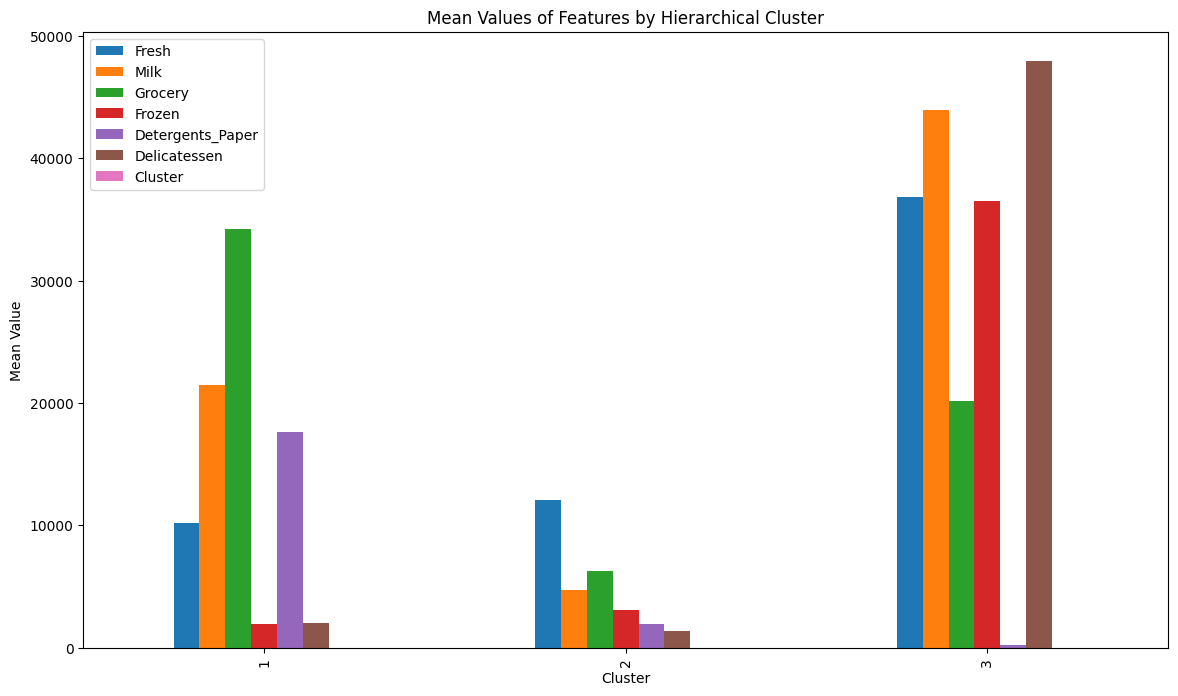

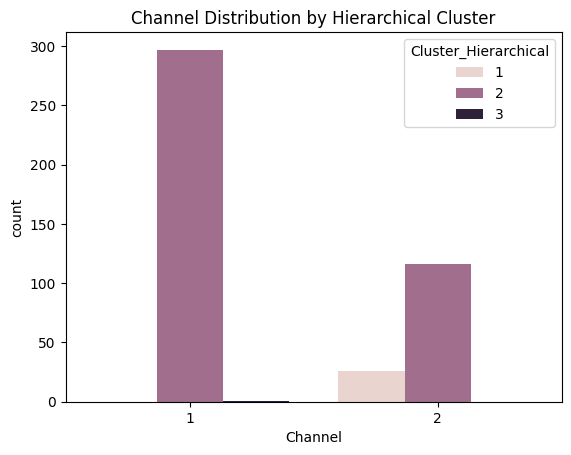

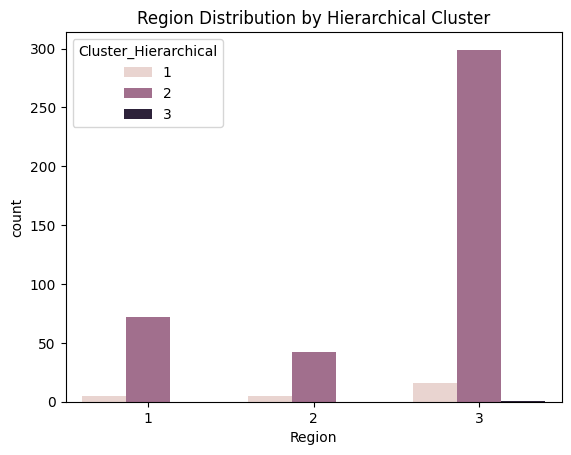

In [29]:
# Cut the dendrogram to form clusters
num_clusters = 3  # ideal number of clusters from dendrogram
clusters_hierarchical = sch.fcluster(linkage_matrix, num_clusters, criterion='maxclust')

# Add hierarchical cluster labels to the original data
data['Cluster_Hierarchical'] = clusters_hierarchical

# Compute cluster summary for numeric columns
cluster_summary_hierarchical = data.groupby('Cluster_Hierarchical')[numeric_columns].mean()

print("Numeric Features Mean Values by Hierarchical Cluster:")
print(cluster_summary_hierarchical)

# Analyze categorical columns separately
print("\nCategory Distribution by Channel (Hierarchical Clustering):")
print(data.groupby('Cluster_Hierarchical')['Channel'].value_counts())

print("\nCategory Distribution by Region (Hierarchical Clustering):")
print(data.groupby('Cluster_Hierarchical')['Region'].value_counts() )

# Plot cluster summary
cluster_summary_hierarchical.plot(kind='bar', figsize=(14, 8))
plt.title('Mean Values of Features by Hierarchical Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()

# Plot for Channel distribution
sns.countplot(x='Channel', hue='Cluster_Hierarchical', data=data)
plt.title('Channel Distribution by Hierarchical Cluster')
plt.show()

# Plot for Region distribution
sns.countplot(x='Region', hue='Cluster_Hierarchical', data=data)
plt.title('Region Distribution by Hierarchical Cluster')
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [30]:
from sklearn.decomposition import PCA

In [31]:
# Perform PCA
pca = PCA()
pca.fit(data_scaled)

# Transform the data into the principal components
data_pca = pca.transform(data_scaled)

# Convert to a DataFrame for easier analysis
pca_df = pd.DataFrame(data_pca, columns=[f'PC{i+1}' for i in range(data_scaled.shape[1])])

# Adding cluster labels for analysis
pca_df['Cluster'] = data['Cluster']

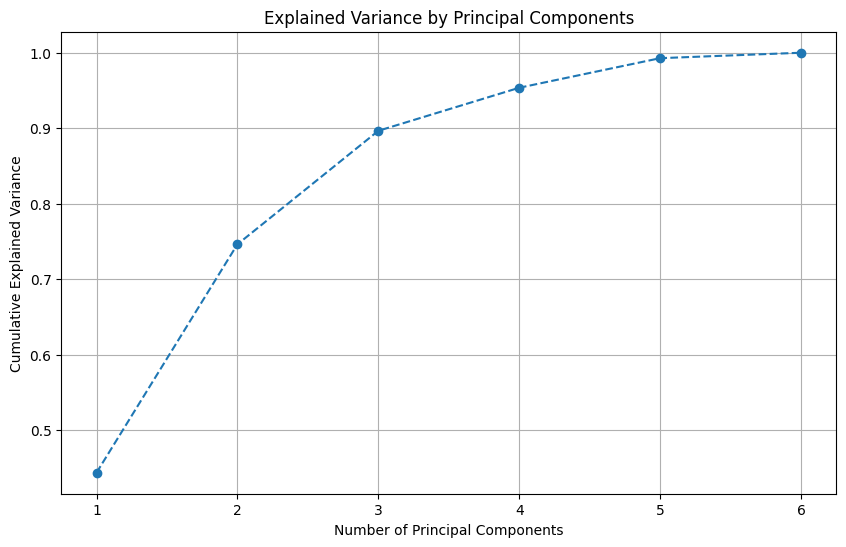

In [32]:
# Explained variance
explained_variance = pca.explained_variance_ratio_

# Plotting the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()

In [33]:
# Loadings for each original column on the first two principal components
pca_components = pd.DataFrame(pca.components_, columns=data_scaled.columns, index=[f'PC{i+1}' for i in range(len(pca.components_))])
print(pca_components)

        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
PC1  0.128201  0.360556  0.219283  0.442044          0.180092      0.760028
PC2 -0.125030  0.402939  0.468091 -0.485678          0.584026     -0.161026
PC3  0.106942  0.125549  0.175565  0.723797          0.230954     -0.603950
PC4  0.954641  0.164112 -0.014217 -0.210010         -0.096833     -0.089691
PC5 -0.206818  0.813955 -0.305921 -0.025253         -0.422516     -0.148184
PC6 -0.048803 -0.049212  0.779868 -0.009458         -0.620681     -0.040855


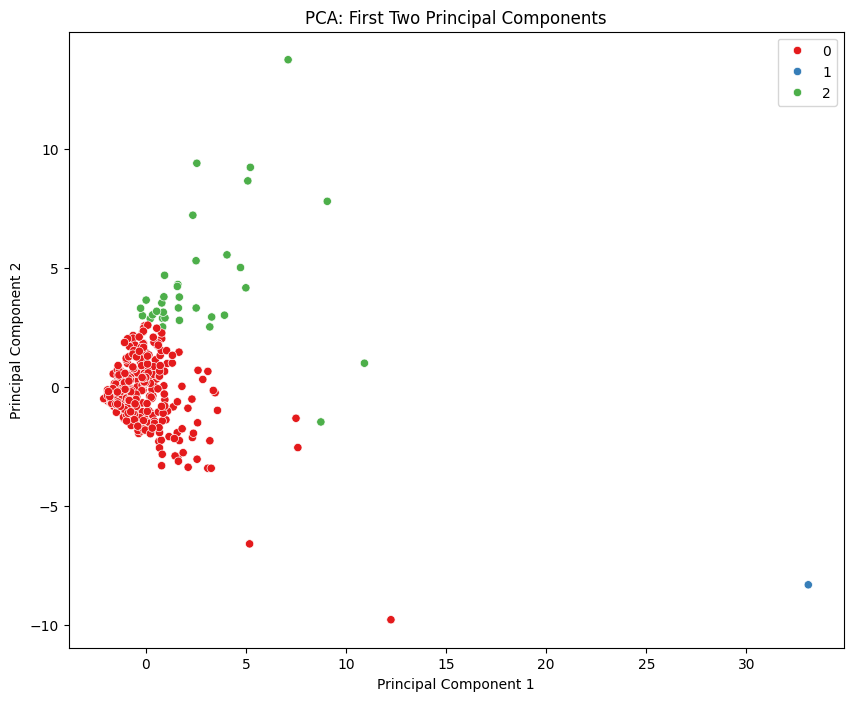

In [34]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set1')
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

1. Features 'Grocery' and 'Detergents_Paper' showed high correlation. There may be more investigation as to whether this may affect the model by leaving 
in or removing from model.
2. Found that the outliers were not errors and likely large purchase orders.
3. Grouping into three clusters appeared to be the best selection. It seemed like the clusters formed around the values of purchases along with other similarities.
4. Looking at the chart for Mean Values for Hierarchical Clusters there were some helpful insight into how the cluster was formed.

Cluster 1 - This cluster had high mean values for Grocery and Milk, where the other categories show lower values. This can be interpreted that they may be more focused on this type of product. The mean values in this cluster could be viewed to be in the middle range. This may show customers with moderately sized purchase orders. 

Cluster 2 - This cluster had a high mean value for Fresh items, while the other features were lower. All of the mean values were low in comparison to the other clusters. This may indicate smaller purchase orders from this group. They might be considered to be small businesses or individual purchasers. 

Cluster 3 - This group showed a high mean value for Delicatessen items. All of the mean values were very high compared to the others. This may indicate larger entities that purchase in greater volume. 

